/tmp/ipykernel_100592/3815343918.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_delta = df.groupby('rating_band')['delta'].mean().reindex(labels)


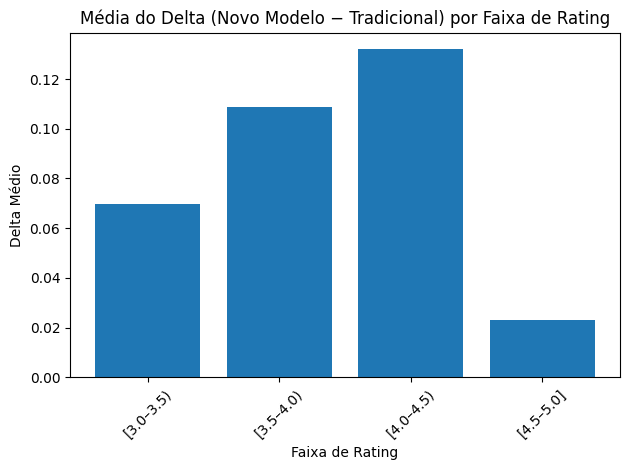

/tmp/ipykernel_100592/3815343918.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=labels)


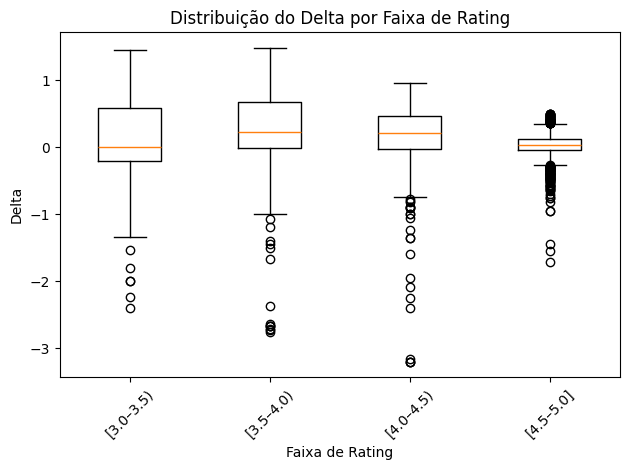

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar dados
df = pd.read_csv('src/data/notas-23-abril-2023.csv')
df['delta'] = df['rating_weight'] - df['rating']

# Definir faixas de rating
bins = [3.0, 3.5, 4.0, 4.5, 5.0]
labels = ['[3.0–3.5)', '[3.5–4.0)', '[4.0–4.5)', '[4.5–5.0]']
df['rating_band'] = pd.cut(df['rating'], bins=bins, labels=labels, right=False)

# Gráfico 1: Média do delta por faixa
mean_delta = df.groupby('rating_band')['delta'].mean().reindex(labels)

plt.figure()
plt.bar(mean_delta.index.astype(str), mean_delta.values)
plt.title('Média do Delta (Novo Modelo − Tradicional) por Faixa de Rating')
plt.xlabel('Faixa de Rating')
plt.ylabel('Delta Médio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico 2: Distribuição do delta por faixa (boxplot)
data_to_plot = [df[df['rating_band'] == b]['delta'] for b in labels]

plt.figure()
plt.boxplot(data_to_plot, labels=labels)
plt.title('Distribuição do Delta por Faixa de Rating')
plt.xlabel('Faixa de Rating')
plt.ylabel('Delta')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
